### Multi Layer Perceptrons

In [1]:
# Configure weights & biases Docs: https://docs.wandb.ai/

# Run this in Colab
!pip install wandb -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00


In [2]:
# import all the packages
import wandb
import numpy as np
import torch
import torch.nn as nn # base class for neural nets

import pandas as pd
from sklearn.preprocessing import StandardScaler

from torch.utils.data import Dataset, DataLoader

In [3]:
# setting up the wandb configurations
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [4]:
# define configs
wandb.init(
    project='Diabetics Detection',
    config= {
        "epochs": 250,
        "batch_size": 32,
        "lr": 0.01
    }
)


config = wandb.config

wandb: Currently logged in as: gihan-ascentic. Use `wandb login --relogin` to force relogin


In [5]:
# importing data
# provide the path correctly
data = pd.read_csv('../data/diabetes.csv')
data.head() # data.tail() can be used to get last n rows

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age,Class
0,6,148,72,35,0,33.6,50,positive
1,1,85,66,29,0,26.6,31,negative
2,8,183,64,0,0,23.3,32,positive
3,1,89,66,23,94,28.1,21,negative
4,0,137,40,35,168,43.1,33,positive


In [6]:
# Seperating predictors and target variables
print(type(data))
X = data.iloc[:,0:7]
Y = list(data.iloc[:,-1])

<class 'pandas.core.frame.DataFrame'>


### Preprocessing
---

In [7]:
# Encoding the Y varaible
# 0 --> negative, 1 ---> positive

# beginers way
y_num = []

for element in Y:
  if element == 'positive':
    y_num.append(1)
  else:
    y_num.append(0)

# pro tip : list comprehension
y_num = [1 if element == 'positive' else 0 for element in Y]

print(y_num)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 

In [8]:
# preprocessing X variable
scaler = StandardScaler()
x_std = scaler.fit_transform(X) # transform X variables into their standardized format

print(x_std[0])

[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
  1.4259954 ]


In [9]:
# Converting Y variable into a numpy array
y_num = np.array(y_num)

In [10]:
# Convert everything into tensors
'''
Important: We are not gonna evaluate the model in this stage. So, we consider all our data as training data
'''

x_train = torch.tensor(x_std)
y_train = torch.tensor(y_num)

In [11]:
print(y_train.shape)

# very important: transforming y_train in to a 2D tensor
y_train = y_train.unsqueeze(1)

print(y_train.shape)
print(x_train.shape)

torch.Size([768])
torch.Size([768, 1])
torch.Size([768, 7])


### Dataset Creation
___

In [12]:
# Create and load mini batches
class DiabeticsDataset(Dataset):
  def __init__(self, x, y):
    self.x = x
    self.y = y

  # return x and y value for a given index
  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return len(self.y)


# creating an actual dataset from the class
dataset = DiabeticsDataset(x_train, y_train)

In [13]:
# Iterable data compoents for training (mini batches)
train_loader = DataLoader(dataset=dataset, batch_size=config.batch_size, shuffle=True)

In [14]:
# Demonstrate the data iteration
for (x_batch, y_batch) in train_loader:
  print(f"X shape: {x_batch.shape}")
  print(f"Y shape: {y_batch.shape}")
  break

X shape: torch.Size([32, 7])
Y shape: torch.Size([32, 1])


### Define Neural Network Architecture
---

In [15]:
# neural network class
class Perceptron(nn.Module):
  def __init__(self, input_features):
    # inherit all the features from parent class
    super(Perceptron, self).__init__()
    self.fc1 = nn.Linear(input_features, 5)
    self.fc2 = nn.Linear(5, 4)
    self.fc3 = nn.Linear(4,3)
    self.fc4 = nn.Linear(3, 1)
    self.tanh = nn.Tanh()
    self.sigmoid  = nn.Sigmoid()


  # method to build the network flow
  def forward(self, x):
    out = self.fc1(x)
    out = self.tanh(out)
    out = self.fc2(out)
    out = self.tanh(out)
    out = self.fc3(out)
    out = self.tanh(out)
    out = self.fc4(out)
    out = self.sigmoid(out)

    return out

### Training Process

In [16]:
# Instantiate the network and the components
perceptron = Perceptron(7)

loss_function = torch.nn.BCELoss(reduction='mean')

optimizer = torch.optim.SGD(perceptron.parameters(), lr=config.lr, momentum=0.9)

In [17]:
# Start the training Process
for epoch in range(config.epochs):
  # inside a single epoch

  for (x_train, y_train) in train_loader:
    # inside a single minibatch

    # network expect everything in float
    x_train = x_train.float()
    y_train = y_train.float()

    # Forward propagation
    outputs = perceptron(x_train)

    # compare with actual outputs and calculate loss
    loss = loss_function(outputs, y_train)

    # Clearing the gradient
    optimizer.zero_grad()

    # backpropagation
    loss.backward()

    # update weights
    optimizer.step()

  outputs = (outputs > 0.5).float()

  accuracy = (outputs == y_train).float().mean()

  # printing results into wand
  metrics = {
      "Epoch": (epoch+1)/(config.epochs),
      "Loss": loss,
      "Accuracy": accuracy
  }

  wandb.log(metrics)

  print(f"Epoch: {(epoch+1)}/{(config.epochs)}, Loss: {loss}, Accuracy: {accuracy}")

wandb.finish()

Epoch: 1/250, Loss: 0.6383649110794067, Accuracy: 0.65625
Epoch: 2/250, Loss: 0.5915557742118835, Accuracy: 0.71875
Epoch: 3/250, Loss: 0.6936523914337158, Accuracy: 0.5625
Epoch: 4/250, Loss: 0.6031307578086853, Accuracy: 0.65625
Epoch: 5/250, Loss: 0.5823071599006653, Accuracy: 0.625
Epoch: 6/250, Loss: 0.5391119718551636, Accuracy: 0.71875
Epoch: 7/250, Loss: 0.48025187849998474, Accuracy: 0.75
Epoch: 8/250, Loss: 0.48090487718582153, Accuracy: 0.78125
Epoch: 9/250, Loss: 0.5479103326797485, Accuracy: 0.75
Epoch: 10/250, Loss: 0.4361461102962494, Accuracy: 0.78125
Epoch: 11/250, Loss: 0.7333639860153198, Accuracy: 0.53125
Epoch: 12/250, Loss: 0.46477770805358887, Accuracy: 0.8125
Epoch: 13/250, Loss: 0.5726985931396484, Accuracy: 0.65625
Epoch: 14/250, Loss: 0.5344509482383728, Accuracy: 0.78125
Epoch: 15/250, Loss: 0.38695353269577026, Accuracy: 0.875
Epoch: 16/250, Loss: 0.5636813640594482, Accuracy: 0.65625
Epoch: 17/250, Loss: 0.5075802803039551, Accuracy: 0.71875
Epoch: 18/250,

Accuracy,▄▅▅▅▇▃▅▅▄▄█▆▆▅▅▇▇▆▅▆▆▃▄▆▆▅▅▅▅▁▆▄▇▆▂▂▄▃▅▄
Epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
Loss,▇▅▆▆▂▆▅▇▆▄▁▄▅▃▄▂▁▃▄▃▃▇▆▃▃▇▅▅▆█▂▄▂▃▆▇▅█▃▄
Accuracy,0.875
Epoch,1.0
Loss,0.39405


### Saving the model

In [18]:
torch.save({
    'model_state_dict': perceptron.state_dict()
},'../model/perceptron.pth')

### Plots from Weight and Biases

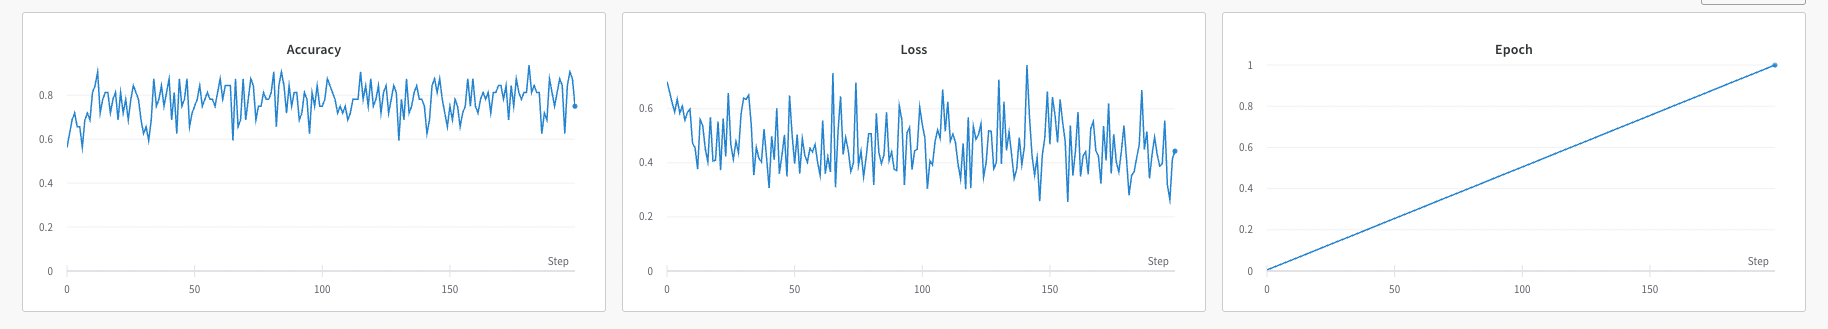